<a href="https://colab.research.google.com/github/GunjalDarshan/Date-prediction-try/blob/main/Cluster_pro_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data=pd.read_excel(r"/content/Telecomchurn_coding_assignment_data_FCPune_202324_Nov2023 1.xlsx")
data.head()

,customerID,churn_Flag,male_cnt,female_cnt,occupation,age,pay_perc,unpaid_inv,device_cnt,days_after_duedate,default_cnt,installm_cnt,risk_Score,avgsubs_cnt,days_since_last_payment,media_Usage_inGB,Unnamed: 16,MonthlyRevenue
0,C1,Y,4,0,Unknown,40.0,1.0,0.0,1.5,30,3,1,C0600,3.33,0,24,NaN,57.49
1,C2,N,0,2,Fulltime / Permanent,27.0,1.0,0.0,1.0,19,2,1,C0500,2.00,0,13,NaN,55.23
2,C3,Y,1,0,Unknown,59.0,0.6,0.4,0.0,11,1,0,C0700,1.00,0,14,NaN,97.34
3,C4,N,2,0,Fulltime / Permanent,20.0,1.0,0.0,0.8,0,0,2,C0500,2.00,141,34,NaN,35.59
4,C5,N,0,1,Unknown,32.0,1.0,0.0,0.0,0,0,1,C0700,1.00,0,13,NaN,55.27


In [3]:
data.corr()


<ipython-input-3-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,male_cnt,female_cnt,age,pay_perc,unpaid_inv,device_cnt,days_after_duedate,default_cnt,installm_cnt,avgsubs_cnt,days_since_last_payment,media_Usage_inGB,Unnamed: 16,MonthlyRevenue
male_cnt,1.000000,-0.491379,0.127654,0.029504,0.039284,0.320359,0.006868,0.002466,0.087364,0.530496,-0.003590,0.008909,NaN,-0.005084
female_cnt,-0.491379,1.000000,0.110861,0.094320,-0.042806,0.274493,-0.028138,-0.023398,0.042326,0.420010,-0.002518,-0.011190,NaN,0.002457
age,0.127654,0.110861,1.000000,0.160036,-0.121839,0.130985,-0.038443,-0.033077,-0.013735,0.254854,-0.149050,-0.003926,NaN,-0.009075
pay_perc,0.029504,0.094320,0.160036,1.000000,-0.711460,0.208262,-0.010681,-0.029676,0.042897,0.211601,-0.113055,-0.000655,NaN,-0.000804
unpaid_inv,0.039284,-0.042806,-0.121839,-0.711460,1.000000,-0.046889,0.056378,0.079654,-0.020994,0.011011,0.113314,0.001598,NaN,-0.000186
device_cnt,0.320359,0.274493,0.130985,0.208262,-0.046889,1.000000,-0.045472,-0.053949,0.013305,0.618957,-0.065523,-0.001038,NaN,-0.011023
days_after_duedate,0.006868,-0.028138,-0.038443,-0.010681,0.056378,-0.045472,1.000000,0.856954,0.044482,-0.015442,-0.036854,0.010720,NaN,0.002779
default_cnt,0.002466,-0.023398,-0.033077,-0.029676,0.079654,-0.053949,0.856954,1.000000,0.071525,-0.011811,-0.017748,0.008719,NaN,-0.000233
installm_cnt,0.087364,0.042326,-0.013735,0.042897,-0.020994,0.013305,0.044482,0.071525,1.000000,0.124327,-0.000931,0.017367,NaN,-0.001169
avgsubs_cnt,0.530496,0.420010,0.254854,0.211601,0.011011,0.618957,-0.015442,-0.011811,0.124327,1.000000,-0.017142,-0.001123,NaN,-0.003255


In [4]:
data.isna().sum()

customerID                     0
churn_Flag                     0
male_cnt                       0
female_cnt                     0
occupation                     0
age                            0
pay_perc                       0
unpaid_inv                     0
device_cnt                     0
days_after_duedate             0
default_cnt                    0
installm_cnt                   0
risk_Score                     0
avgsubs_cnt                    0
days_since_last_payment        0
media_Usage_inGB               0
Unnamed: 16                15000
MonthlyRevenue                18
dtype: int64

In [5]:
data.drop(['Unnamed: 16'], axis=1)

,customerID,churn_Flag,male_cnt,female_cnt,occupation,age,pay_perc,unpaid_inv,device_cnt,days_after_duedate,default_cnt,installm_cnt,risk_Score,avgsubs_cnt,days_since_last_payment,media_Usage_inGB,MonthlyRevenue
0,C1,Y,4,0,Unknown,40.00,1.0,0.0,1.50,30,3,1,C0600,3.33,0,24,57.49
1,C2,N,0,2,Fulltime / Permanent,27.00,1.0,0.0,1.00,19,2,1,C0500,2.00,0,13,55.23
2,C3,Y,1,0,Unknown,59.00,0.6,0.4,0.00,11,1,0,C0700,1.00,0,14,97.34
3,C4,N,2,0,Fulltime / Permanent,20.00,1.0,0.0,0.80,0,0,2,C0500,2.00,141,34,35.59
4,C5,N,0,1,Unknown,32.00,1.0,0.0,0.00,0,0,1,C0700,1.00,0,13,55.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,C14996,N,4,0,Fulltime / Permanent,35.75,1.0,0.0,2.33,0,0,5,C0700,4.00,0,89,77.60
14996,C14997,N,0,1,Fulltime / Permanent,41.00,1.0,0.0,0.00,0,0,0,C0600,1.00,105,103,74.06
14997,C14998,N,0,1,Unknown,54.00,1.0,0.0,1.00,24,1,2,C0700,1.00,0,21,40.52
14998,C14999,Y,1,0,Unknown,41.00,0.5,0.5,0.00,0,0,0,C0420,1.00,105,29,19.99


In [6]:
data['occupation'].unique()

array(['Unknown', 'Fulltime / Permanent', 'Self Employed', 'MANAGER',
       'BOOKKEEPER', 'DIRECTOR', 'NURSE', 'CLEANER', 'ASSISTANT',
       'LABOURER', 'CATERER', 'SALES ASSISTANT', 'TEACHER', 'ADJUSTER',
       'OPERATOR', 'CALL CENTRE AGENT', 'ANALYST', 'CONSULTANT',
       'CARETAKER', 'FINANCIAL MANAGER', 'TECHNICIAN',
       'MUNICIPALITY EMPLOYEE', 'MACHINIST', 'GENERAL MANAGER',
       'SUPERVISOR', 'HAIRDRESSER', 'AUDITOR', 'DRIVER', 'MUSICIAN',
       'SECRETARY', 'ACCOUNTANT', 'SECURITY OFFICER', 'TECH', 'STUDENT',
       'DESIGNER', 'CHEF', 'BUYER', 'WORK', 'EXECUTIVE',
       'HR PROFESSIONAL', 'SALES REPRESENTIVE', 'MINER', 'CLERK',
       'TECHNICAL OFFICIAL', 'POLICE OFFICER', 'COLLECTIONS ADVISOR',
       'SOLDIER', 'PSYCHOLOGIST', 'RECEPTIONIST', 'IT SPECIALIST',
       'ENGINEER', 'BOILERMAKER', 'Contractor', 'PACKER', 'INSTRUCTOR',
       'SYSTEMS ANALYST', 'Pensioner / Retired', 'FIREFIGHTER', 'PLUMBER',
       'HEALTH ASSESSOR', 'DATA ANALYST', 'INSPECTOR',
    

In [7]:
# Example: Imputation using mean
data['MonthlyRevenue'].fillna(data['MonthlyRevenue'].mean(), inplace=True)


In [8]:
data.isna().sum()

customerID                     0
churn_Flag                     0
male_cnt                       0
female_cnt                     0
occupation                     0
age                            0
pay_perc                       0
unpaid_inv                     0
device_cnt                     0
days_after_duedate             0
default_cnt                    0
installm_cnt                   0
risk_Score                     0
avgsubs_cnt                    0
days_since_last_payment        0
media_Usage_inGB               0
Unnamed: 16                15000
MonthlyRevenue                 0
dtype: int64

In [9]:
data.dropna(axis=1)

,customerID,churn_Flag,male_cnt,female_cnt,occupation,age,pay_perc,unpaid_inv,device_cnt,days_after_duedate,default_cnt,installm_cnt,risk_Score,avgsubs_cnt,days_since_last_payment,media_Usage_inGB,MonthlyRevenue
0,C1,Y,4,0,Unknown,40.00,1.0,0.0,1.50,30,3,1,C0600,3.33,0,24,57.49
1,C2,N,0,2,Fulltime / Permanent,27.00,1.0,0.0,1.00,19,2,1,C0500,2.00,0,13,55.23
2,C3,Y,1,0,Unknown,59.00,0.6,0.4,0.00,11,1,0,C0700,1.00,0,14,97.34
3,C4,N,2,0,Fulltime / Permanent,20.00,1.0,0.0,0.80,0,0,2,C0500,2.00,141,34,35.59
4,C5,N,0,1,Unknown,32.00,1.0,0.0,0.00,0,0,1,C0700,1.00,0,13,55.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,C14996,N,4,0,Fulltime / Permanent,35.75,1.0,0.0,2.33,0,0,5,C0700,4.00,0,89,77.60
14996,C14997,N,0,1,Fulltime / Permanent,41.00,1.0,0.0,0.00,0,0,0,C0600,1.00,105,103,74.06
14997,C14998,N,0,1,Unknown,54.00,1.0,0.0,1.00,24,1,2,C0700,1.00,0,21,40.52
14998,C14999,Y,1,0,Unknown,41.00,0.5,0.5,0.00,0,0,0,C0420,1.00,105,29,19.99


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               15000 non-null  object 
 1   churn_Flag               15000 non-null  object 
 2   male_cnt                 15000 non-null  int64  
 3   female_cnt               15000 non-null  int64  
 4   occupation               15000 non-null  object 
 5   age                      15000 non-null  float64
 6   pay_perc                 15000 non-null  float64
 7   unpaid_inv               15000 non-null  float64
 8   device_cnt               15000 non-null  float64
 9   days_after_duedate       15000 non-null  int64  
 10  default_cnt              15000 non-null  int64  
 11  installm_cnt             15000 non-null  int64  
 12  risk_Score               15000 non-null  object 
 13  avgsubs_cnt              15000 non-null  float64
 14  days_since_last_paymen

In [11]:
from sklearn.preprocessing import *
le=LabelEncoder()


In [12]:
data['churn_Flag']=le.fit_transform(data['churn_Flag'])
data['occupation']=le.fit_transform(data['occupation'])
data['risk_Score']=le.fit_transform(data['risk_Score'])



In [13]:
df=data.drop(['customerID', 'Unnamed: 16'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn_Flag               15000 non-null  int64  
 1   male_cnt                 15000 non-null  int64  
 2   female_cnt               15000 non-null  int64  
 3   occupation               15000 non-null  int64  
 4   age                      15000 non-null  float64
 5   pay_perc                 15000 non-null  float64
 6   unpaid_inv               15000 non-null  float64
 7   device_cnt               15000 non-null  float64
 8   days_after_duedate       15000 non-null  int64  
 9   default_cnt              15000 non-null  int64  
 10  installm_cnt             15000 non-null  int64  
 11  risk_Score               15000 non-null  int64  
 12  avgsubs_cnt              15000 non-null  float64
 13  days_since_last_payment  15000 non-null  int64  
 14  media_Usage_inGB      

In [15]:
# from sklearn.preprocessing import StandardScaler
# #sc=StandardScaler()

In [16]:
# scaler = StandardScaler()

# # Perform standard scaling on all columns
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [17]:
df

,churn_Flag,male_cnt,female_cnt,occupation,age,pay_perc,unpaid_inv,device_cnt,days_after_duedate,default_cnt,installm_cnt,risk_Score,avgsubs_cnt,days_since_last_payment,media_Usage_inGB,MonthlyRevenue
0,1,4,0,259,40.00,1.0,0.0,1.50,30,3,1,13,3.33,0,24,57.49
1,0,0,2,96,27.00,1.0,0.0,1.00,19,2,1,12,2.00,0,13,55.23
2,1,1,0,259,59.00,0.6,0.4,0.00,11,1,0,14,1.00,0,14,97.34
3,0,2,0,96,20.00,1.0,0.0,0.80,0,0,2,12,2.00,141,34,35.59
4,0,0,1,259,32.00,1.0,0.0,0.00,0,0,1,14,1.00,0,13,55.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,4,0,96,35.75,1.0,0.0,2.33,0,0,5,14,4.00,0,89,77.60
14996,0,0,1,96,41.00,1.0,0.0,0.00,0,0,0,13,1.00,105,103,74.06
14997,0,0,1,259,54.00,1.0,0.0,1.00,24,1,2,14,1.00,0,21,40.52
14998,1,1,0,259,41.00,0.5,0.5,0.00,0,0,0,11,1.00,105,29,19.99


In [18]:
data['age'] = data['age'].astype(int)

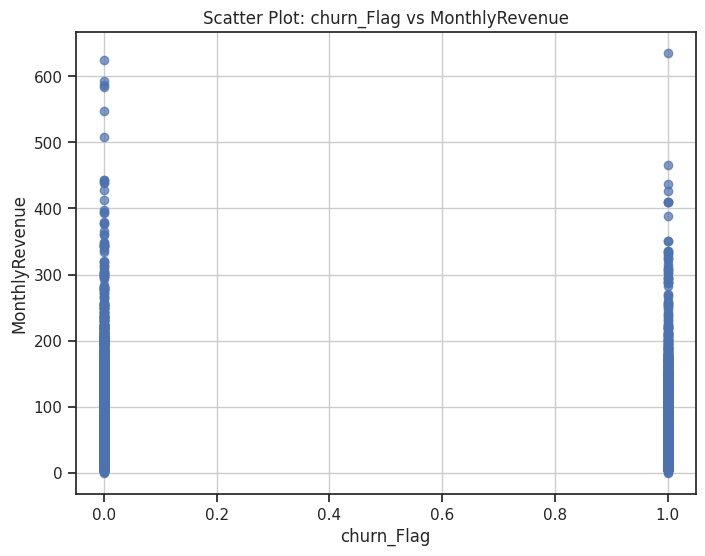

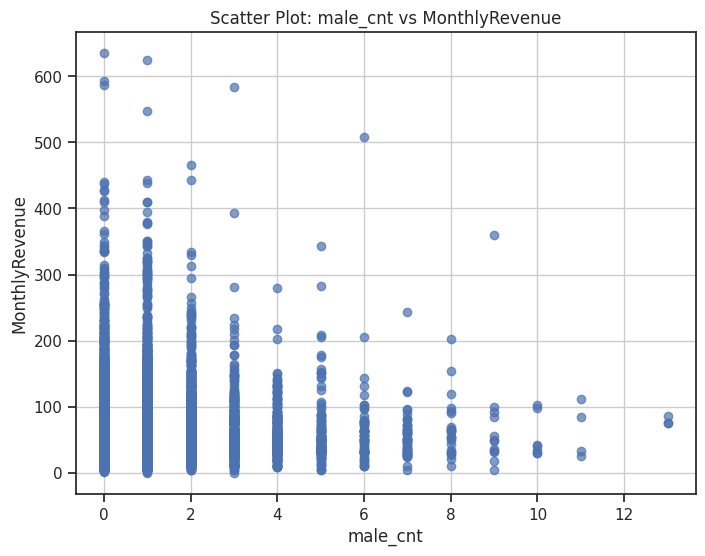

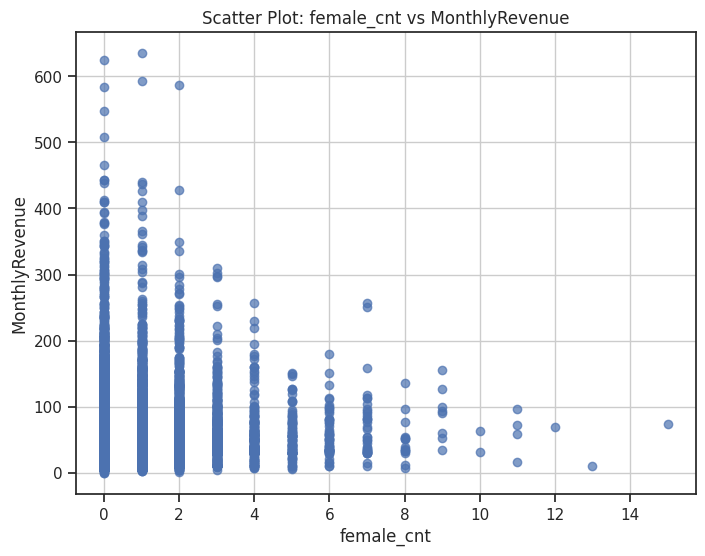

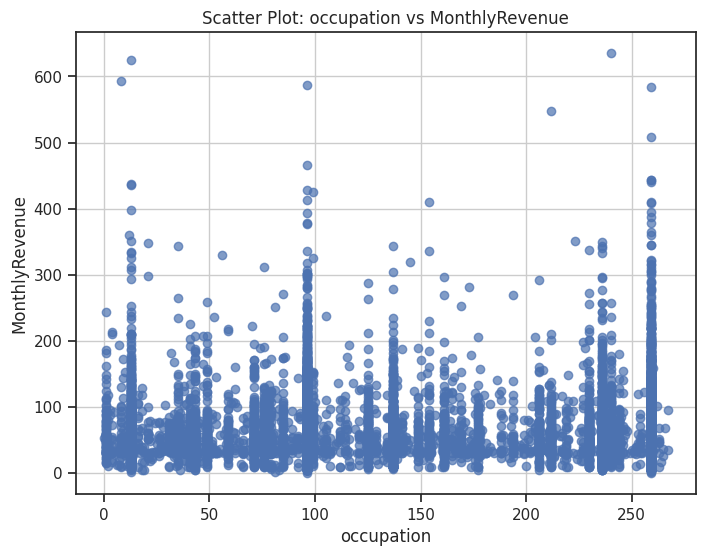

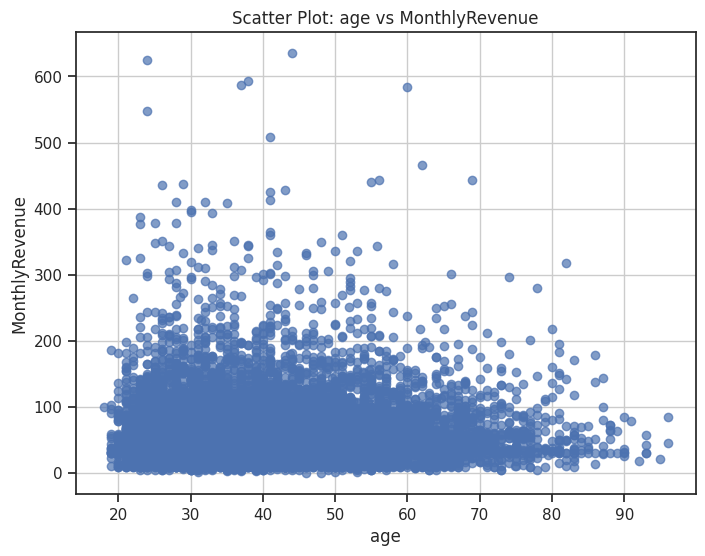

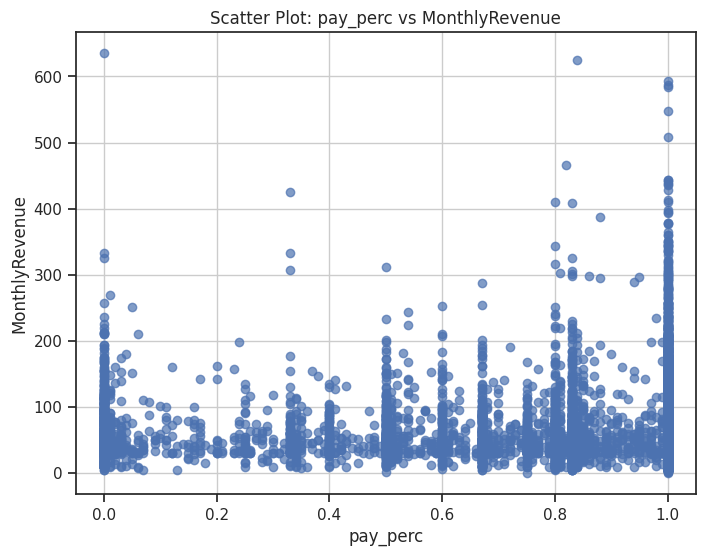

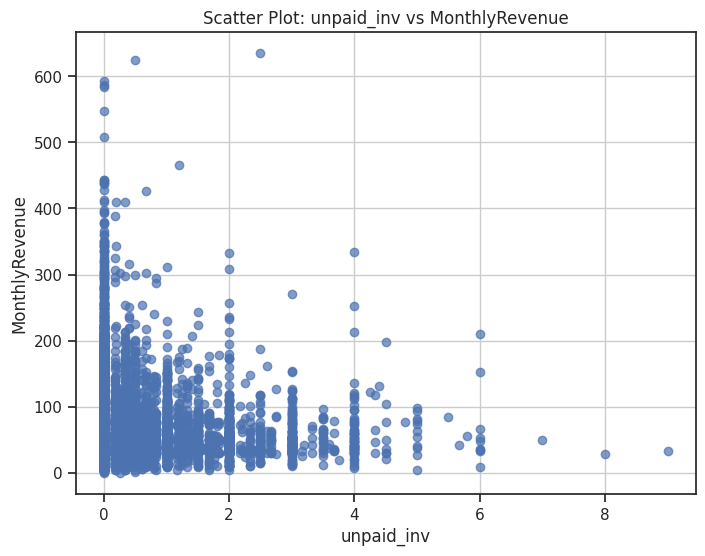

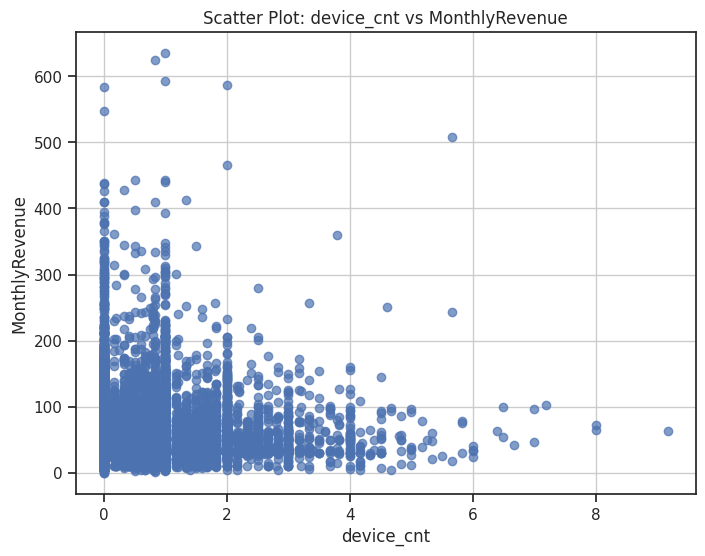

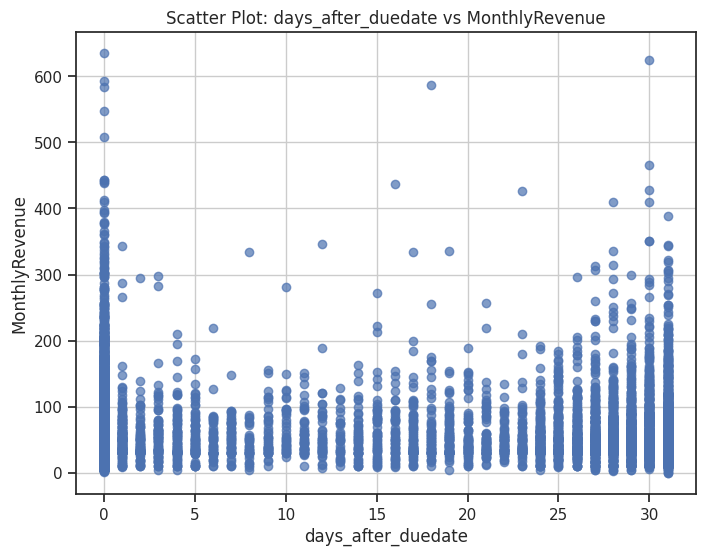

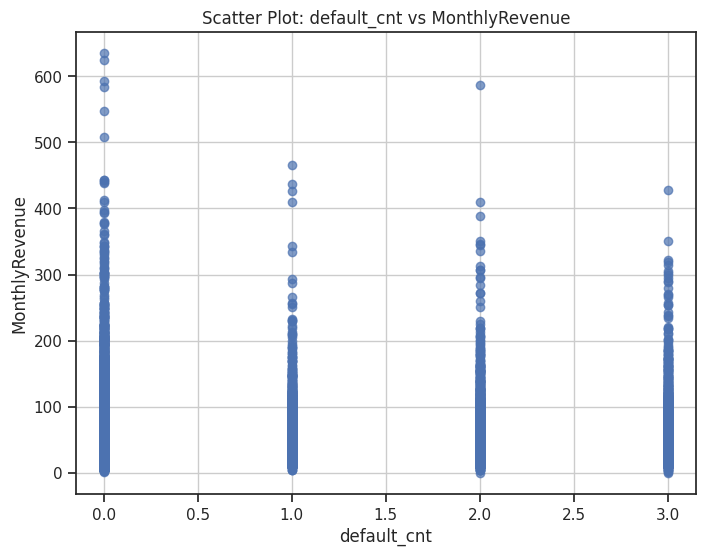

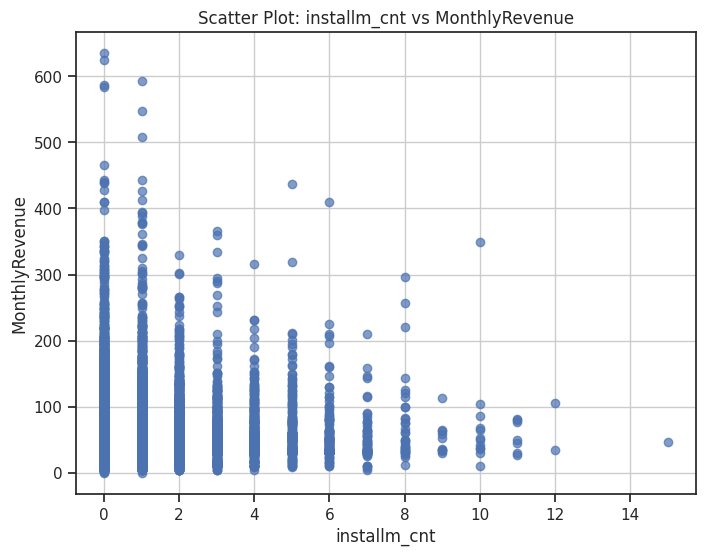

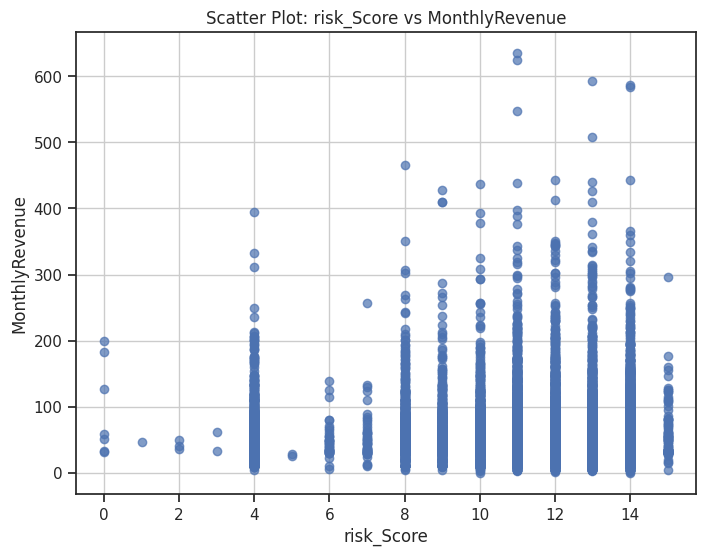

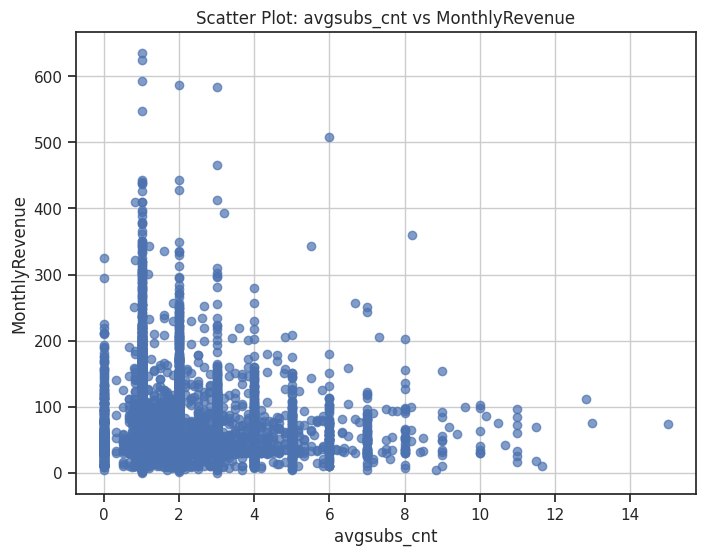

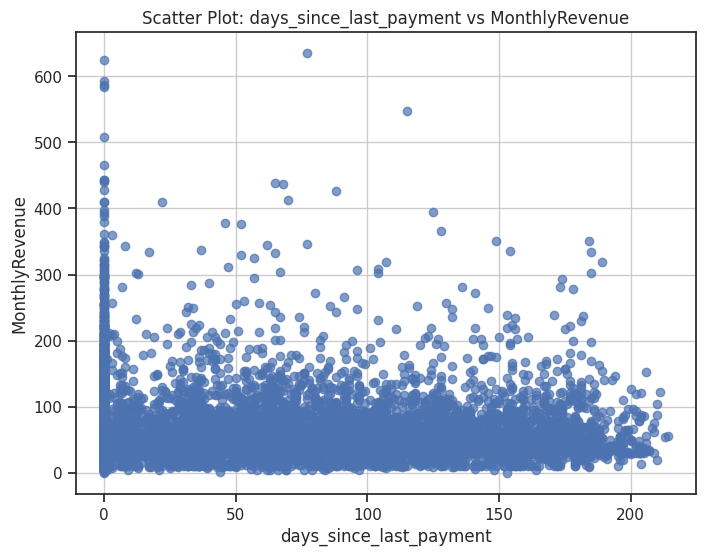

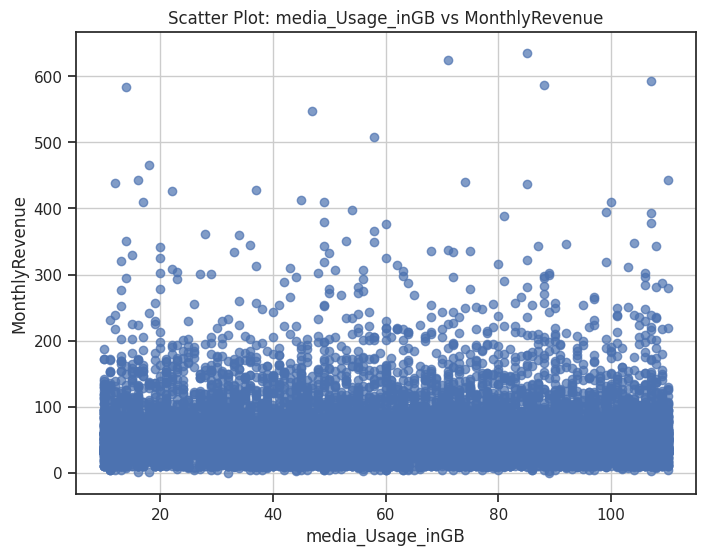

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for enhanced styling

# Assuming 'df_cleaned' is your cleaned DataFrame without null values
# Replace 'MonthlyRevenue' with your actual target column name
target_column = 'MonthlyRevenue'

# Optional: Set seaborn style for enhanced visualization
sns.set(style="ticks")

# Create scatter plots for all columns against the target variable
for column in df.columns:
    if column != target_column:
        plt.figure(figsize=(8, 6))
        plt.scatter(df[column], df[target_column], alpha=0.7)
        plt.title(f'Scatter Plot: {column} vs {target_column}')
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.grid(True)
        plt.show()


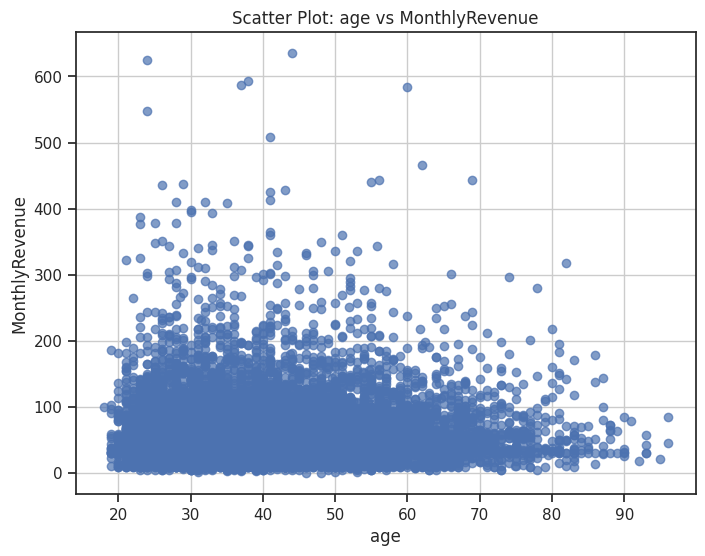

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for enhanced styling

# Assuming 'df_cleaned' is your cleaned DataFrame without null values
# Replace 'MonthlyRevenue' and 'age' with your actual column names
target_column = 'MonthlyRevenue'
feature_column = 'age'

# Optional: Set seaborn style for enhanced visualization
sns.set(style="ticks")

# Create scatter plot for MonthlyRevenue against age
plt.figure(figsize=(8, 6))
plt.scatter(df[feature_column], df[target_column], alpha=0.7)
plt.title(f'Scatter Plot: {feature_column} vs {target_column}')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.grid(True)
plt.show()


In [21]:
X= df[['occupation','MonthlyRevenue']]

In [22]:
from sklearn.cluster import KMeans
dg=KMeans()
see=[]


In [23]:
see=[]
k_rng=range(1,10)
for k in k_rng:
    dg=KMeans(n_clusters=k)
    dg.fit(X)
    see.append(dg.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

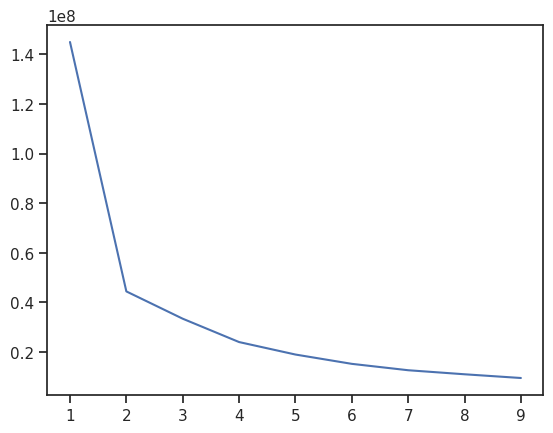

In [24]:
plt.plot(k_rng,see)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()

In [27]:
X['MonthlyRevenue']=sc.fit_transform(X[['MonthlyRevenue']])
X['occupation']=sc.fit_transform(X[['occupation']])
X

<ipython-input-27-b159c62450f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MonthlyRevenue']=sc.fit_transform(X[['MonthlyRevenue']])
<ipython-input-27-b159c62450f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation']=sc.fit_transform(X[['occupation']])


,occupation,MonthlyRevenue
0,1.146488,-0.032432
1,-0.708738,-0.083708
2,1.146488,0.871717
3,-0.708738,-0.529316
4,1.146488,-0.082801
...,...,...
14995,-0.708738,0.423840
14996,-0.708738,0.343522
14997,1.146488,-0.417460
14998,1.146488,-0.883261


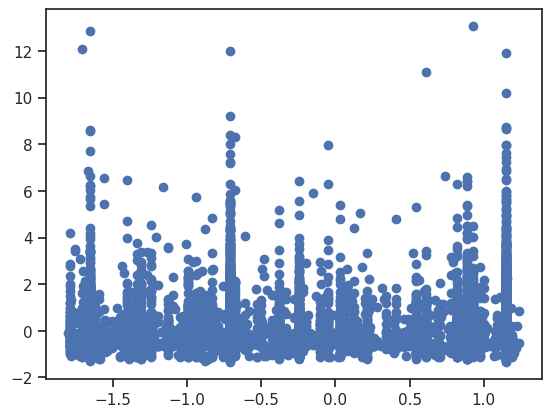

In [28]:
plt.scatter(X['occupation'],X['MonthlyRevenue'])

In [29]:
df=KMeans(n_clusters=5)
dg.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [30]:
dg.cluster_centers_

array([[-0.61045251, -0.50736301],
       [ 1.04044746,  0.14850719],
       [-0.89816526,  1.8273295 ],
       [ 1.00843986,  1.44024206],
       [-1.54947795, -0.36962902],
       [-0.14937651,  7.61552902],
       [-0.71037152,  0.43778145],
       [ 0.25638404,  3.9136857 ],
       [ 1.0397489 , -0.60750431]])

In [31]:
pred=dg.predict(X)

In [32]:
c0 = X[pred==0]
c1 = X[pred==1]
c2 = X[pred==2]
c3 = X[pred==3]
c4 = X[pred==4]
# c5 = X[pred==5]
# c6 = X[pred==6]
# c7 = X[pred==7]
# c8 = X[pred==8]
# c9 = X[pred==9]
# c10 = X[pred==10]

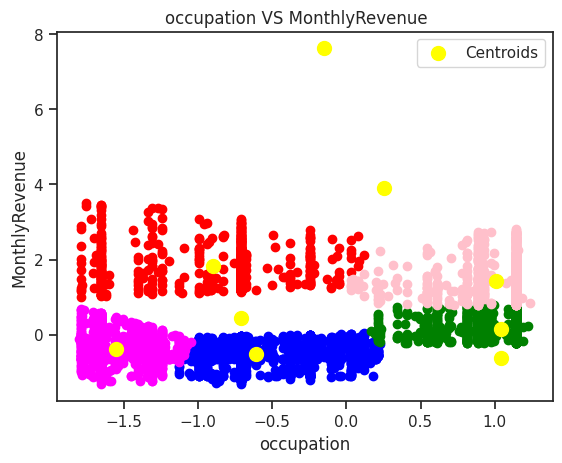

In [33]:
plt.scatter(c0['occupation'], c0['MonthlyRevenue'],c = 'blue')
plt.scatter(c1['occupation'], c1['MonthlyRevenue'],c = 'green')
plt.scatter(c2['occupation'], c2['MonthlyRevenue'],c = 'red')
plt.scatter(c3['occupation'], c3['MonthlyRevenue'],c = 'pink')
plt.scatter(c4['occupation'], c4['MonthlyRevenue'],c = 'magenta')
#plt.scatter(c5['occupation'], c5['MonthlyRevenue'],c = 'hotpink')
#plt.scatter(c6['occupation'], c6['MonthlyRevenue'],c = '#88c999')
#plt.scatter(c7['occupation'], c7['MonthlyRevenue'],c = 'orange')
#plt.scatter(c8['occupation'], c8['MonthlyRevenue'],c = 'beige')
#plt.scatter(c9['occupation'], c9['MonthlyRevenue'],c = 'brown')
#plt.scatter(c10['occupation'], c10['MonthlyRevenue'],c = 'cyan')
plt.scatter(dg.cluster_centers_[:, 0], dg.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('occupation VS MonthlyRevenue   ')
plt.xlabel('occupation')
plt.ylabel('MonthlyRevenue')
plt.legend()
plt.show()

<ipython-input-34-c1c7a89885bc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['occupation'])


Text(0, 0.5, 'Count')

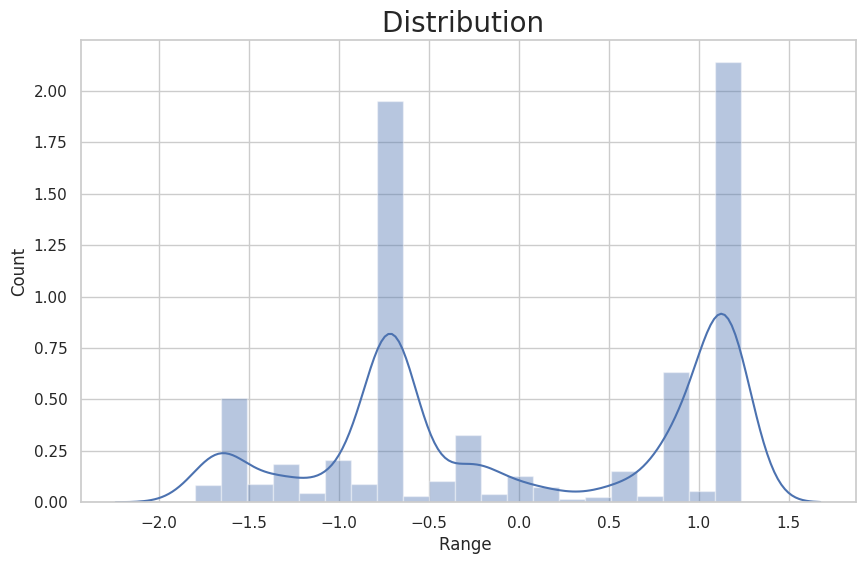

In [34]:
#Distribution of
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(X['occupation'])
plt.title('Distribution ', fontsize = 20)
plt.xlabel('Range ')
plt.ylabel('Count')

<ipython-input-35-eb660bf2999b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['MonthlyRevenue'])


Text(0, 0.5, 'Count')

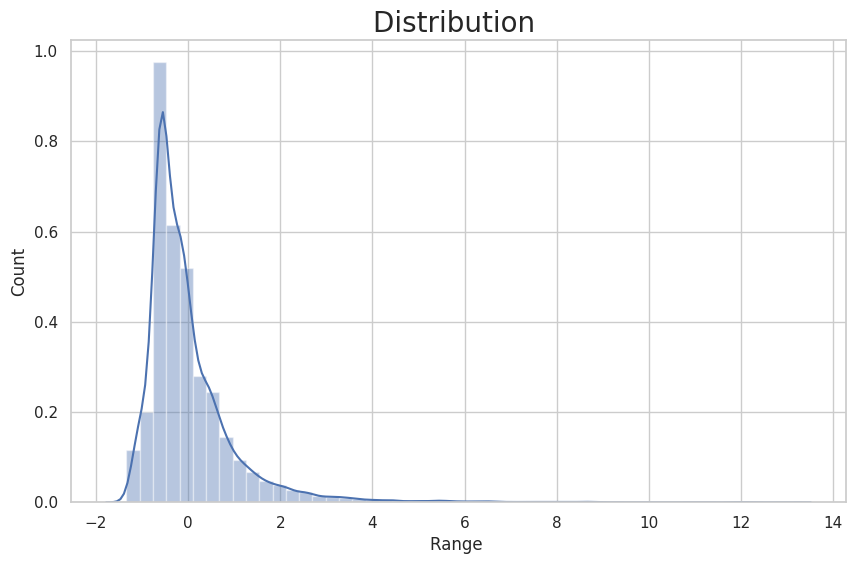

In [35]:
#Distribution of
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(X['MonthlyRevenue'])
plt.title('Distribution ', fontsize = 20)
plt.xlabel('Range ')
plt.ylabel('Count')

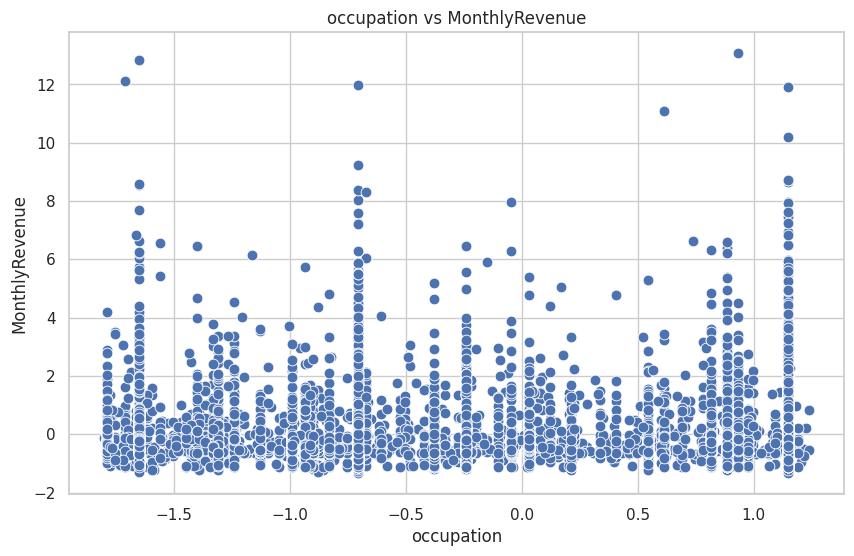

In [36]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'occupation',y = 'MonthlyRevenue',  data = X  ,s = 60 )
plt.xlabel('occupation')
plt.ylabel('MonthlyRevenue')
plt.title('occupation vs MonthlyRevenue')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

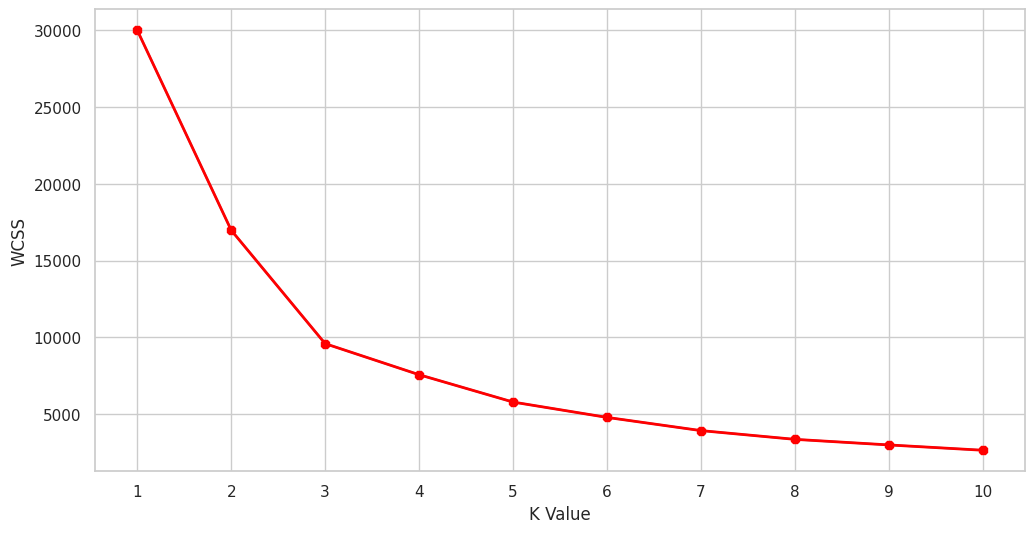

In [37]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [38]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
X["label"] = y
#The new dataframe with the clustering done

# Adding the 'customerID' column to the DataFrame X
X['customerID'] = data['customerID']


X.head()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-38-b9fbe84cc7b4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["label"] = y
<ipython-input-38-b9fbe84cc7b4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['customerID'] = data['customerID']


,occupation,MonthlyRevenue,label,customerID
0,1.146488,-0.032432,0,C1
1,-0.708738,-0.083708,2,C2
2,1.146488,0.871717,4,C3
3,-0.708738,-0.529316,2,C4
4,1.146488,-0.082801,0,C5


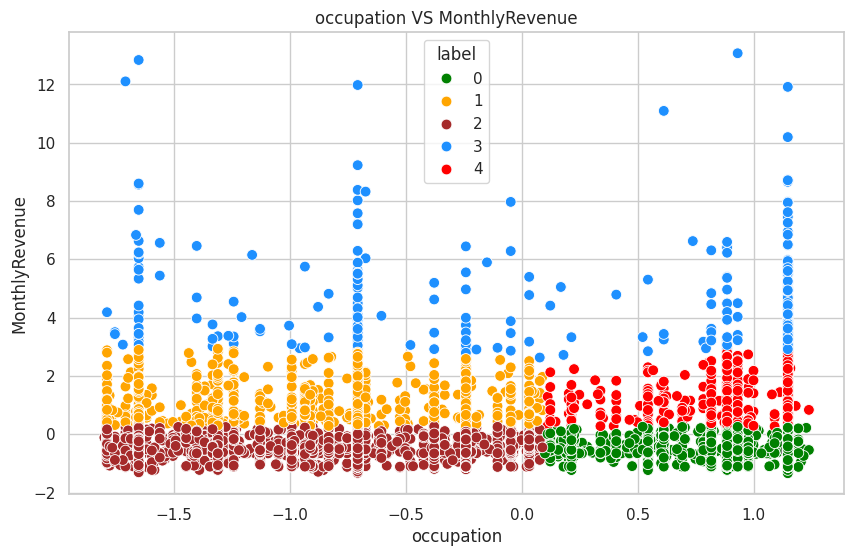

In [39]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'occupation',y = 'MonthlyRevenue',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = X  ,s = 60 )
plt.xlabel('occupation')
plt.ylabel('MonthlyRevenue')
plt.title('occupation VS MonthlyRevenue    ')
plt.show()

In [40]:
cust1=X[X["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["customerID"].values)
print("--------------------------------------------")
cust2=X[X["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["customerID"].values)
print("--------------------------------------------")
cust3=X[X["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["customerID"].values)
print("--------------------------------------------")
cust4=X[X["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["customerID"].values)
print("--------------------------------------------")
cust5=X[X["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["customerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 1865
They are - ['C18' 'C22' 'C26' ... 'C14993' 'C14996' 'C14997']
--------------------------------------------
Number of customer in 2nd group= 6198
They are - ['C2' 'C4' 'C6' ... 'C14992' 'C14995' 'C15000']
--------------------------------------------
Number of customer in 3rd group= 5041
They are - ['C1' 'C5' 'C8' ... 'C14994' 'C14998' 'C14999']
--------------------------------------------
Number of customer in 4th group= 306
They are - ['C10' 'C61' 'C68' 'C82' 'C114' 'C126' 'C127' 'C147' 'C180' 'C206' 'C243'
 'C248' 'C257' 'C311' 'C353' 'C540' 'C548' 'C550' 'C698' 'C801' 'C814'
 'C829' 'C879' 'C905' 'C1053' 'C1066' 'C1079' 'C1145' 'C1171' 'C1214'
 'C1258' 'C1344' 'C1397' 'C1490' 'C1610' 'C1621' 'C1636' 'C1717' 'C1725'
 'C1728' 'C1742' 'C1799' 'C1819' 'C1821' 'C1863' 'C1874' 'C1947' 'C1963'
 'C2110' 'C2136' 'C2147' 'C2161' 'C2177' 'C2235' 'C2289' 'C2322' 'C2360'
 'C2461' 'C2476' 'C2489' 'C2584' 'C2609' 'C2638' 'C2715' 'C2719' 'C2745'
 'C2750' 'C2789'

In [41]:
data

,customerID,churn_Flag,male_cnt,female_cnt,occupation,age,pay_perc,unpaid_inv,device_cnt,days_after_duedate,default_cnt,installm_cnt,risk_Score,avgsubs_cnt,days_since_last_payment,media_Usage_inGB,Unnamed: 16,MonthlyRevenue
0,C1,1,4,0,259,40,1.0,0.0,1.50,30,3,1,13,3.33,0,24,NaN,57.49
1,C2,0,0,2,96,27,1.0,0.0,1.00,19,2,1,12,2.00,0,13,NaN,55.23
2,C3,1,1,0,259,59,0.6,0.4,0.00,11,1,0,14,1.00,0,14,NaN,97.34
3,C4,0,2,0,96,20,1.0,0.0,0.80,0,0,2,12,2.00,141,34,NaN,35.59
4,C5,0,0,1,259,32,1.0,0.0,0.00,0,0,1,14,1.00,0,13,NaN,55.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,C14996,0,4,0,96,35,1.0,0.0,2.33,0,0,5,14,4.00,0,89,NaN,77.60
14996,C14997,0,0,1,96,41,1.0,0.0,0.00,0,0,0,13,1.00,105,103,NaN,74.06
14997,C14998,0,0,1,259,54,1.0,0.0,1.00,24,1,2,14,1.00,0,21,NaN,40.52
14998,C14999,1,1,0,259,41,0.5,0.5,0.00,0,0,0,11,1.00,105,29,NaN,19.99


In [42]:
Z = data[['age', 'MonthlyRevenue']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

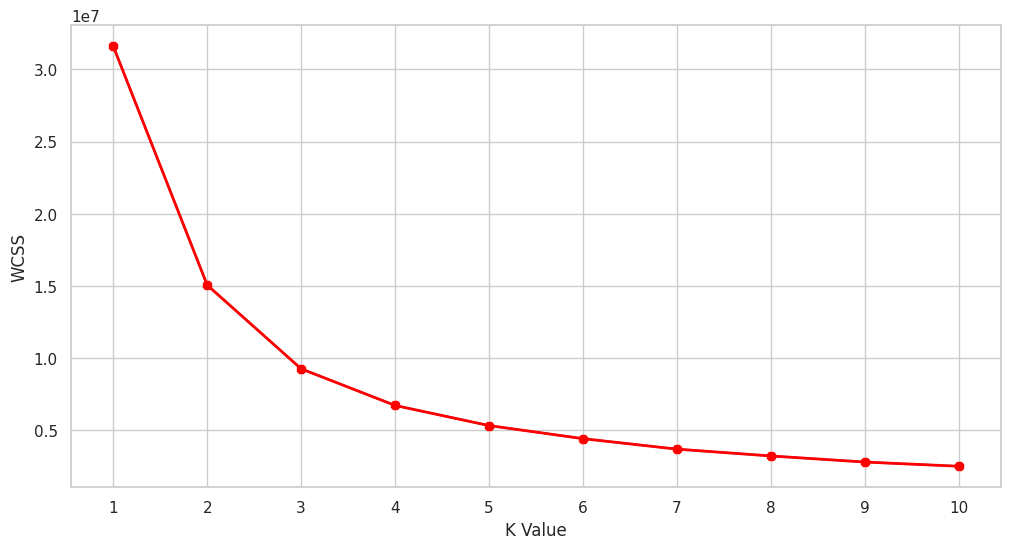

In [43]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(Z)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [44]:
Z['MonthlyRevenue']=sc.fit_transform(Z[['MonthlyRevenue']])
Z['age']=sc.fit_transform(Z[['age']])
Z

<ipython-input-44-27a2bcae6dbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['MonthlyRevenue']=sc.fit_transform(Z[['MonthlyRevenue']])
<ipython-input-44-27a2bcae6dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['age']=sc.fit_transform(Z[['age']])


,age,MonthlyRevenue
0,-0.073029,-0.032432
1,-1.087106,-0.083708
2,1.409083,0.871717
3,-1.633147,-0.529316
4,-0.697076,-0.082801
...,...,...
14995,-0.463059,0.423840
14996,0.004977,0.343522
14997,1.019054,-0.417460
14998,0.004977,-0.883261


In [45]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(Z)
#predicting the labels of the input data
y=km1.predict(Z)
#adding the labels to a column named label
Z["label"] = y
#The new dataframe with the clustering done

# Adding the 'customerID' column to the DataFrame X
#Z['customerID'] = data['customerID']


Z.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-45-4707679a1d8b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z["label"] = y


,age,MonthlyRevenue,label
0,-0.073029,-0.032432,4
1,-1.087106,-0.083708,0
2,1.409083,0.871717,2
3,-1.633147,-0.529316,0
4,-0.697076,-0.082801,0


<ipython-input-46-f38fddbfba42>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'age',y = 'MonthlyRevenue',


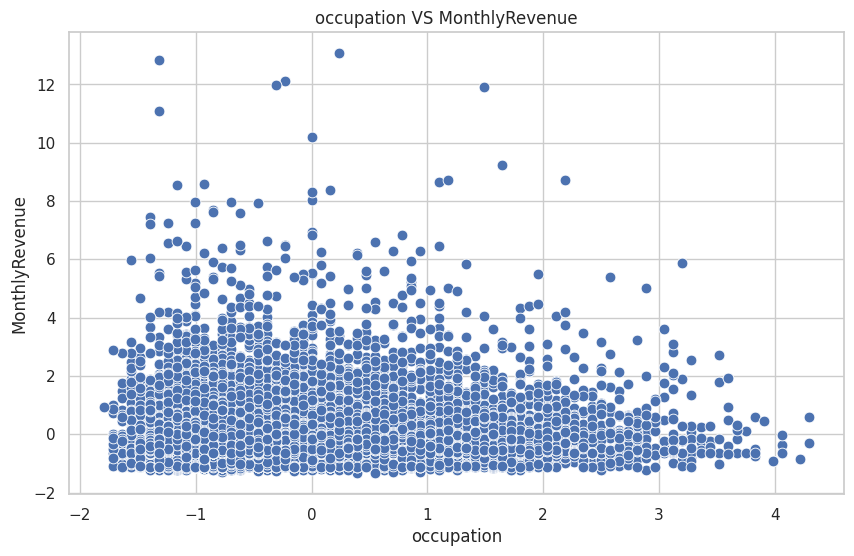

In [46]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'age',y = 'MonthlyRevenue',
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = Z  ,s = 60 )
plt.xlabel('occupation')
plt.ylabel('MonthlyRevenue')
plt.title('occupation VS MonthlyRevenue    ')
plt.show()

In [47]:
df=KMeans(n_clusters=5)
dg.fit(Z)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [48]:
dg.cluster_centers_

array([[-8.43375478e-01, -6.18142286e-01,  5.99520433e-14],
       [ 3.20833059e-01, -3.73694961e-01,  4.00000000e+00],
       [ 8.70001538e-02,  3.88830060e+00,  1.00000000e+00],
       [ 3.03548276e-01,  1.26362986e+00,  3.00000000e+00],
       [ 1.71573173e+00, -4.53610155e-01,  2.00000000e+00],
       [-2.41357662e-01,  7.54950777e+00,  1.00000000e+00],
       [-8.16157150e-01,  1.25859584e+00,  3.00000000e+00],
       [ 1.53440572e+00,  6.32959124e-01,  1.99868421e+00],
       [-8.89048353e-01,  5.91772941e-02,  6.88338275e-15]])

In [49]:
pred=dg.predict(Z)

In [50]:
c1 = Z[pred==1]
c2 = Z[pred==2]
c3 = Z[pred==3]
c4 = Z[pred==4]
c5 = Z[pred==5]

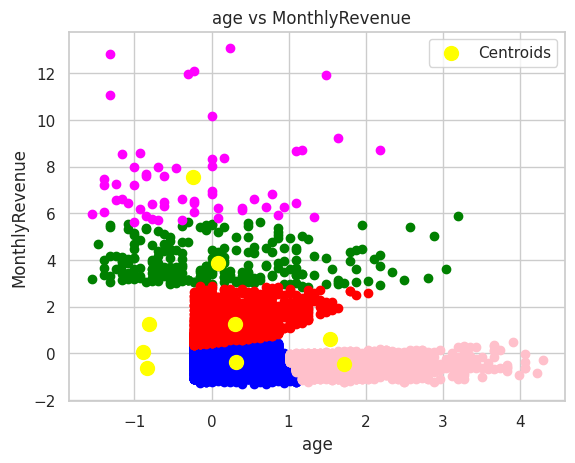

In [51]:
plt.scatter(c1['age'], c1['MonthlyRevenue'],c = 'blue')
plt.scatter(c2['age'], c2['MonthlyRevenue'],c = 'green')
plt.scatter(c3['age'], c3['MonthlyRevenue'],c = 'red')
plt.scatter(c4['age'], c4['MonthlyRevenue'],c = 'pink')
plt.scatter(c5['age'], c5['MonthlyRevenue'],c = 'magenta')

plt.scatter(dg.cluster_centers_[:, 0], dg.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('age vs MonthlyRevenue  ')
plt.xlabel('age')
plt.ylabel('MonthlyRevenue')
plt.legend()
plt.show()

In [52]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(Z)
#predicting the labels of the input data
y=km1.predict(Z)
#adding the labels to a column named label
Z["label"] = y
#The new dataframe with the clustering done

# Adding the 'customerID' column to the DataFrame X
Z['customerID'] = data['customerID']


Z.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-52-373b8dcf3a93>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z["label"] = y
<ipython-input-52-373b8dcf3a93>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['customerID'] = data['customerID']


,age,MonthlyRevenue,label,customerID
0,-0.073029,-0.032432,2,C1
1,-1.087106,-0.083708,1,C2
2,1.409083,0.871717,4,C3
3,-1.633147,-0.529316,1,C4
4,-0.697076,-0.082801,1,C5


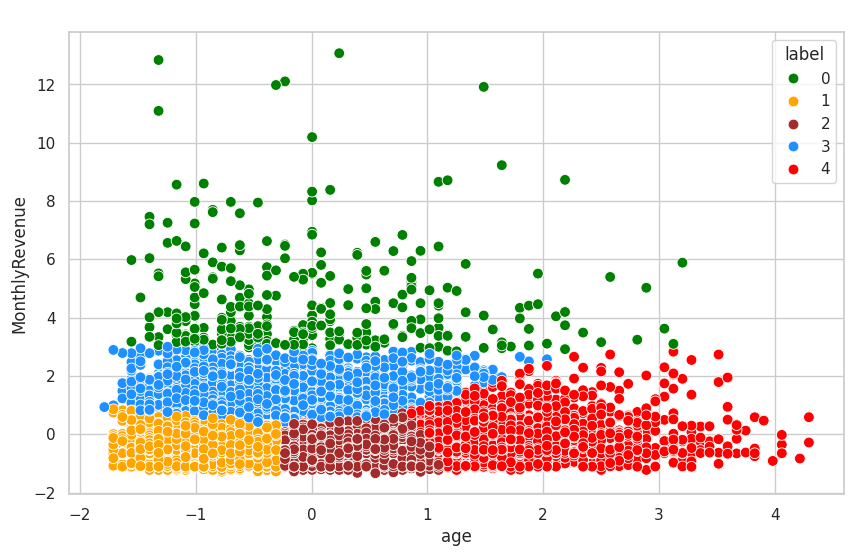

In [53]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'age',y = 'MonthlyRevenue',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = Z  ,s = 60 )
plt.xlabel('age')
plt.ylabel('MonthlyRevenue')
plt.title('  ')
plt.show()

In [54]:
cust1=Z[Z["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["customerID"].values)
print("--------------------------------------------")
cust2=Z[Z["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["customerID"].values)
print("--------------------------------------------")
cust3=Z[Z["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["customerID"].values)
print("--------------------------------------------")
cust4=Z[Z["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["customerID"].values)
print("--------------------------------------------")
cust5=Z[Z["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["customerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 291
They are - ['C10' 'C61' 'C68' 'C82' 'C114' 'C126' 'C127' 'C147' 'C180' 'C206' 'C243'
 'C248' 'C257' 'C311' 'C353' 'C540' 'C548' 'C698' 'C801' 'C814' 'C829'
 'C879' 'C905' 'C1053' 'C1066' 'C1079' 'C1145' 'C1171' 'C1214' 'C1258'
 'C1322' 'C1344' 'C1397' 'C1490' 'C1621' 'C1636' 'C1717' 'C1725' 'C1728'
 'C1742' 'C1799' 'C1819' 'C1821' 'C1863' 'C1874' 'C1947' 'C1963' 'C2110'
 'C2136' 'C2147' 'C2161' 'C2177' 'C2235' 'C2289' 'C2322' 'C2360' 'C2461'
 'C2476' 'C2489' 'C2584' 'C2638' 'C2715' 'C2719' 'C2745' 'C2750' 'C2789'
 'C2890' 'C3063' 'C3119' 'C3183' 'C3254' 'C3269' 'C3318' 'C3328' 'C3355'
 'C3495' 'C3526' 'C3542' 'C3628' 'C3631' 'C3652' 'C3658' 'C3663' 'C3691'
 'C3731' 'C3736' 'C3847' 'C4052' 'C4056' 'C4058' 'C4065' 'C4069' 'C4077'
 'C4086' 'C4094' 'C4209' 'C4215' 'C4433' 'C4496' 'C4512' 'C4632' 'C4685'
 'C4736' 'C4743' 'C4767' 'C4788' 'C4809' 'C4834' 'C4858' 'C4862' 'C4896'
 'C5042' 'C5098' 'C5134' 'C5242' 'C5384' 'C5458' 'C5508' 'C5537' 'C5575'
 'C558

In [55]:
C = data[['age', 'media_Usage_inGB']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

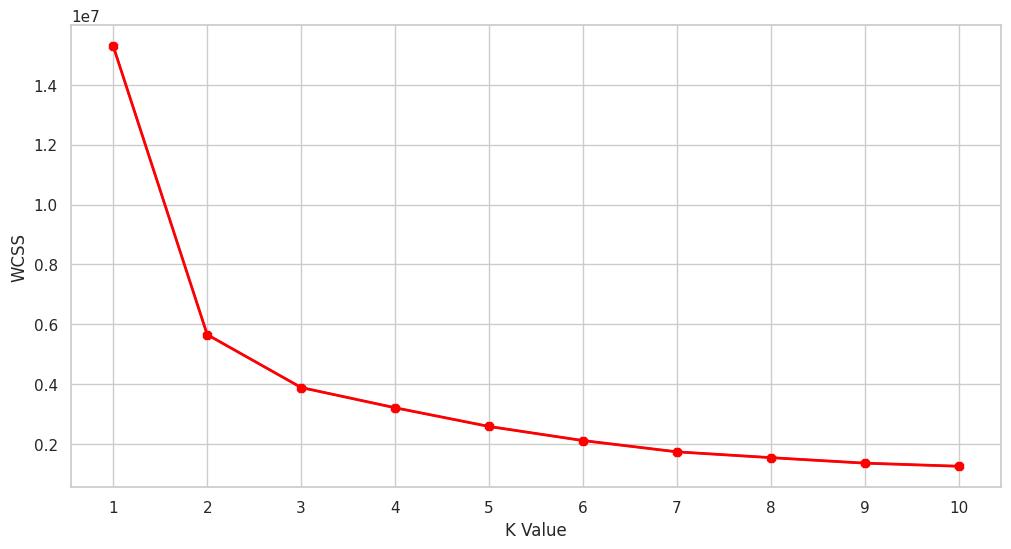

In [56]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(C)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [57]:
C['media_Usage_inGB']=sc.fit_transform(C[['media_Usage_inGB']])
C['age']=sc.fit_transform(C[['age']])
C

<ipython-input-57-76c4db05b603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['media_Usage_inGB']=sc.fit_transform(C[['media_Usage_inGB']])
<ipython-input-57-76c4db05b603>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['age']=sc.fit_transform(C[['age']])


,age,media_Usage_inGB
0,-0.073029,-1.232378
1,-1.087106,-1.608725
2,1.409083,-1.574511
3,-1.633147,-0.890244
4,-0.697076,-1.608725
...,...,...
14995,-0.463059,0.991493
14996,0.004977,1.470480
14997,1.019054,-1.335018
14998,0.004977,-1.061311


In [58]:
#Taking 5 clusters
km=KMeans(n_clusters=6)
#Fitting the input data
km.fit(C)
#predicting the labels of the input data
y=km.predict(C)
#adding the labels to a column named label
C["label"] = y
#The new dataframe with the clustering done

# Adding the 'customerID' column to the DataFrame X
C['customerID'] = data['customerID']


C.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-58-a46949f455f1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C["label"] = y
<ipython-input-58-a46949f455f1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['customerID'] = data['customerID']


,age,media_Usage_inGB,label,customerID
0,-0.073029,-1.232378,1,C1
1,-1.087106,-1.608725,1,C2
2,1.409083,-1.574511,3,C3
3,-1.633147,-0.890244,1,C4
4,-0.697076,-1.608725,1,C5


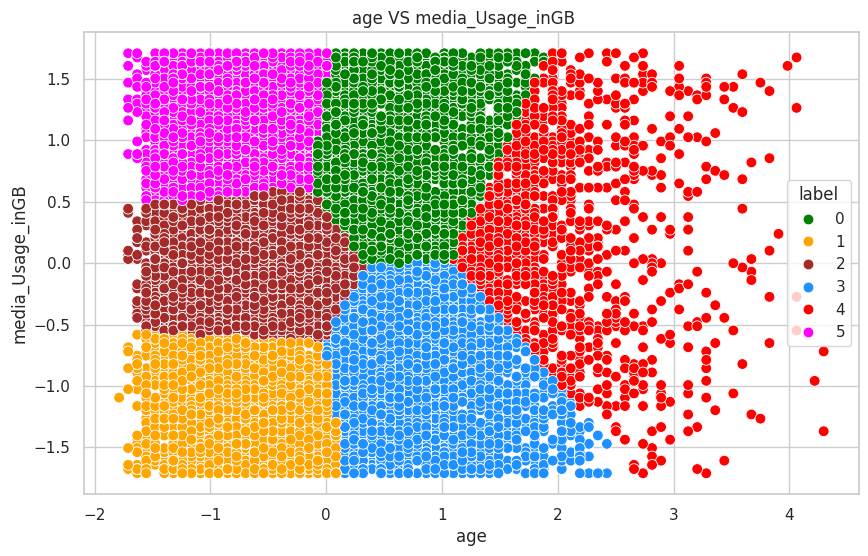

In [59]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'age',y = 'media_Usage_inGB',hue="label",
                 palette=['green','orange','brown','dodgerblue','red','magenta'], legend='full',data = C  ,s = 60 )
plt.xlabel('age')
plt.ylabel('media_Usage_inGB')
plt.title('age VS media_Usage_inGB   ')
plt.show()

In [60]:
cust1=C[C["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["customerID"].values)
print("--------------------------------------------")
cust2=C[C["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["customerID"].values)
print("--------------------------------------------")
cust3=C[C["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["customerID"].values)
print("--------------------------------------------")
cust4=C[C["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["customerID"].values)
print("--------------------------------------------")
cust5=C[C["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["customerID"].values)
print("--------------------------------------------")
cust6=C[C["label"]==5]
print('Number of customer in 5th group=', len(cust6))
print('They are -', cust6["customerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 2618
They are - ['C10' 'C15' 'C19' ... 'C14990' 'C14994' 'C14997']
--------------------------------------------
Number of customer in 2nd group= 2831
They are - ['C1' 'C2' 'C4' ... 'C14992' 'C14999' 'C15000']
--------------------------------------------
Number of customer in 3rd group= 2977
They are - ['C20' 'C25' 'C34' ... 'C14971' 'C14974' 'C14993']
--------------------------------------------
Number of customer in 4th group= 2668
They are - ['C3' 'C9' 'C13' ... 'C14986' 'C14991' 'C14998']
--------------------------------------------
Number of customer in 5th group= 1110
They are - ['C16' 'C17' 'C28' ... 'C14976' 'C14981' 'C14985']
--------------------------------------------
Number of customer in 5th group= 2796
They are - ['C6' 'C7' 'C8' ... 'C14988' 'C14995' 'C14996']
--------------------------------------------
